**Best-First Search**

1.

In [ ]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx

def best_first_search(source, target, n):
    visited = [0] * n
    visited[source] = True
    pq = PriorityQueue()
    pq.put((0, source))
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ") # the path having lowest cost
        if u == target:
            break
        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()
# for adding edges to graph
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))
    
G = nx.Graph()
v = int(input("Enter the number of nodes: "))
graph = [[] for i in range(v)] # undirected Graph
e = int(input("Enter the number of edges: "))
print("Enter the edges along with their weights:")

for i in range(e):
    x, y, z = list(map(int, input().split()))
    addedge(x, y, z)
    G.add_edge(x, y, weight = z)
    
source = int(input("Enter the Source Node: ")) 
target = int(input("Enter the Target/Destination Node: "))
print("\nPath: ", end = "")
best_first_search(source, target, v)

Enter the number of nodes: 10
Enter the number of edges: 9
Enter the edges along with their weights:
0 1 3
0 2 2
1 3 4
1 4 1
2 5 3
2 6 1
6 8 2
6 9 3
5 7 5
Enter the Source Node: 9
Enter the Target/Destination Node: 0

Path: 9 6 2 0 


2.

In [ ]:
from queue import PriorityQueue
v = 5
graph = [[] for i in range(v)]
def best_first_search(source, target, n):
  visited = [0] * n
  visited[0] = True
  pq = PriorityQueue()
  pq.put((0, source))
  while pq.empty() == False:
    u = pq.get()[1]
    print(u, end=" ")
    if u == target:
      break
    for v, c in graph[u]:
      if visited[v] == False:
        visited[v] = True
        pq.put((c, v))
  print()
def addedge(x, y, cost):
  graph[x].append((y, cost))
  graph[y].append((x, cost))
addedge(0, 1, 5)
addedge(0, 2, 1)
addedge(2, 3, 2)
addedge(1, 4, 1)
addedge(3, 4, 2)
source = 0
target = 4
best_first_search(source, target, v)

0 2 3 4 


Graph:



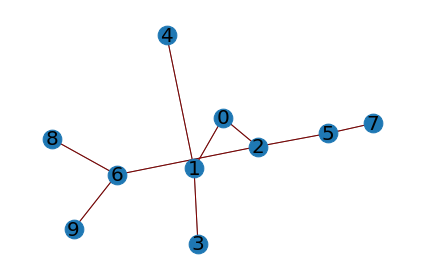

In [ ]:
print("Graph:\n")
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=350)

# edges
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="r")

# labels
nx.draw_networkx_labels(G, pos, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

**A* Search**

1.

In [ ]:
# graph class
class Graph:
    
    # init class
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    # create undirected graph by adding symmetric edges
    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist

    # add link from A and B of given distance, and also add the inverse link if the graph is undirected
    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance

    # get neighbors or a neighbor
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    # return list of nodes in the graph
    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

# node class
class Node:

    # init class
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0 # distance to start node
        self.h = 0 # distance to goal node
        self.f = 0 # total cost

    # compare nodes
    def __eq__(self, other):
        return self.name == other.name

    # sort nodes
    def __lt__(self, other):
         return self.f < other.f

    # print node
    def __repr__(self):
        return ('({0},{1})'.format(self.name, self.f))

# A* search
def astar_search(graph, heuristics, start, end):
    
    # lists for open nodes and closed nodes
    open = []
    closed = []

    # a start node and an goal node
    start_node = Node(start, None)
    goal_node = Node(end, None)

    # add start node
    open.append(start_node)
    
    # loop until the open list is empty
    while len(open) > 0:

       
        open.sort()                                 # sort open list to get the node with the lowest cost first
        current_node = open.pop(0)                  # get node with the lowest cost
        closed.append(current_node)                 # add current node to the closed list
        
        # check if we have reached the goal, return the path
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            return path[::-1]

        
        neighbors = graph.get(current_node.name)    # get neighbours
        
        # loop neighbors
        for key, value in neighbors.items():
            neighbor = Node(key, current_node)      # create neighbor node
            if(neighbor in closed):                 # check if the neighbor is in the closed list
                continue

            # calculate full path cost
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.g + neighbor.h

            # check if neighbor is in open list and if it has a lower f value
            if(add_to_open(open, neighbor) == True):

                # everything is green, add neighbor to open list
                open.append(neighbor)

    # return None, no path is found
    return None

# check if a neighbor should be added to open list
def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f > node.f):
            return False
    return True

# create a graph
graph = Graph() # user-based input for edges will be updated in the upcoming days
# create graph connections (Actual distance)
graph.connect('Frankfurt', 'Wurzburg', 111)
graph.connect('Frankfurt', 'Mannheim', 85)
graph.connect('Wurzburg', 'Nurnberg', 104)
graph.connect('Wurzburg', 'Stuttgart', 140)
graph.connect('Wurzburg', 'Ulm', 183)
graph.connect('Mannheim', 'Nurnberg', 230)
graph.connect('Mannheim', 'Karlsruhe', 67)
graph.connect('Karlsruhe', 'Basel', 191)
graph.connect('Karlsruhe', 'Stuttgart', 64)
graph.connect('Nurnberg', 'Ulm', 171)
graph.connect('Nurnberg', 'Munchen', 170)
graph.connect('Nurnberg', 'Passau', 220)
graph.connect('Stuttgart', 'Ulm', 107)
graph.connect('Basel', 'Bern', 91)
graph.connect('Basel', 'Zurich', 85)
graph.connect('Bern', 'Zurich', 120)
graph.connect('Zurich', 'Memmingen', 184)
graph.connect('Memmingen', 'Ulm', 55)
graph.connect('Memmingen', 'Munchen', 115)
graph.connect('Munchen', 'Ulm', 123)
graph.connect('Munchen', 'Passau', 189)
graph.connect('Munchen', 'Rosenheim', 59)
graph.connect('Rosenheim', 'Salzburg', 81)
graph.connect('Passau', 'Linz', 102)
graph.connect('Salzburg', 'Linz', 126)
# make graph undirected, create symmetric connections
graph.make_undirected()
# create heuristics (straight-line distance, air-travel distance)
heuristics = {}
heuristics['Basel'] = 204
heuristics['Bern'] = 247
heuristics['Frankfurt'] = 215
heuristics['Karlsruhe'] = 137
heuristics['Linz'] = 318
heuristics['Mannheim'] = 164
heuristics['Munchen'] = 120
heuristics['Memmingen'] = 47
heuristics['Nurnberg'] = 132
heuristics['Passau'] = 257
heuristics['Rosenheim'] = 168
heuristics['Stuttgart'] = 75
heuristics['Salzburg'] = 236
heuristics['Wurzburg'] = 153
heuristics['Zurich'] = 157
heuristics['Ulm'] = 0
# run the search algorithm
path = astar_search(graph, heuristics, 'Frankfurt', 'Ulm')
print("Path:", path)

Path: ['Frankfurt: 0', 'Wurzburg: 111', 'Ulm: 294']


2.

In [ ]:
from collections import deque

class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}

        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']